# Is the correlation found between form and meaning an artifact of the way the baseline is constructed?</b>

In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import LsiModel
from adjustText import adjust_text

os.chdir("c:/Users/Raya/OneDrive/Documents/3-CSAI/CSAI-Y3-S2/Thesis/csai-thesis")

# Import the config module
config_dir = 'scripts/computations'
sys.path.append(config_dir)
import config

In [3]:
configs = config.Experiment()

In [4]:
# Define the vocabularity to be used
vocab_type = 'raw'

if vocab_type == 'raw':
    vocab = configs.load_pkl(configs.vocab_path)
    dist_scores_dir = configs.dist_scores_dir
else:
    vocab = configs.load_pkl(configs.vocab_monomorph_path)
    dist_scores_dir = configs.dist_scores_monomorph_dir


lsa_model = LsiModel.load(configs.lsa_model_path)

word_ids_by_wordlength = configs.group_word_ids_by_word_length(vocab)

# Define the plors style
plt.style.use('ggplot')

# Scatterplot of average form distances vs. average cosine/semantic distances

In [5]:
# Import the average distance scores from the corresponding file into a dataframe
avg_dist_scores_path = os.path.join(dist_scores_dir, configs.avg_dist_scores_filename)

results_df = pd.read_csv(avg_dist_scores_path)

In [6]:
results_df.head()

,id,word,word_length,local_avg_cos_dist_raw,local_avg_form_dist_edit,global_avg_cos_dist_raw,global_avg_form_dist_edit,local_avg_cos_dist_raw.1,local_avg_form_dist_edit_norm,global_avg_cos_dist_raw.1,...,global_avg_cos_dist_ang,global_avg_form_dist_edit.3,local_avg_cos_dist_ang.1,local_avg_form_dist_edit_norm.3,global_avg_cos_dist_ang.1,global_avg_form_dist_edit_norm.3,local_avg_cos_dist_ang.2,local_avg_form_dist_jaccard.3,global_avg_cos_dist_ang.2,global_avg_form_dist_jaccard.3
0,1777,cup,3,0.996970,2.850806,0.998499,5.093478,0.996970,0.950269,0.998499,...,0.499517,5.093478,0.499028,0.950269,0.499517,0.940146,0.499028,0.965846,0.499517,0.963504
1,86,art,3,0.999852,2.770161,0.998712,4.617702,0.999852,0.923387,0.998712,...,0.499571,4.617702,0.499953,0.923387,0.499571,0.854698,0.499953,0.919683,0.499571,0.900313
2,3515,jpg,3,0.999198,2.927419,1.000681,5.233851,0.999198,0.975806,1.000681,...,0.500213,5.233851,0.499745,0.975806,0.500213,0.966009,0.499745,0.975918,0.500213,0.977310
3,706,men,3,0.998268,2.645161,0.997824,4.647826,0.998268,0.881720,0.997824,...,0.499304,4.647826,0.499445,0.881720,0.499304,0.859669,0.499445,0.935252,0.499304,0.913948
4,653,law,3,1.000691,2.701613,0.999282,4.877950,1.000691,0.900538,0.999282,...,0.499740,4.877950,0.500220,0.900538,0.499740,0.897271,0.500220,0.940508,0.499740,0.934777


In [7]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3221 non-null   int64  
 1   word                              3221 non-null   object 
 2   word_length                       3221 non-null   int64  
 3   local_avg_cos_dist_raw            3221 non-null   float64
 4   local_avg_form_dist_edit          3221 non-null   float64
 5   global_avg_cos_dist_raw           3221 non-null   float64
 6   global_avg_form_dist_edit         3221 non-null   float64
 7   local_avg_cos_dist_raw.1          3221 non-null   float64
 8   local_avg_form_dist_edit_norm     3221 non-null   float64
 9   global_avg_cos_dist_raw.1         3221 non-null   float64
 10  global_avg_form_dist_edit_norm    3221 non-null   float64
 11  local_avg_cos_dist_raw.2          3221 non-null   float64
 12  local_

## Remove duplicate columns

In [8]:
# Identify the base column names
base_columns = {}
for col in results_df.columns:
    base_name = col.split('.')[0]
    if base_name not in base_columns:
        base_columns[base_name] = []
    base_columns[base_name].append(col)

# Check if the values in duplicate columns are the same
differences = {}
for base_name, cols in base_columns.items():
    if len(cols) > 1:
        # Compare each pair of columns in the group
        for i in range(len(cols) - 1):
            col1 = cols[i]
            col2 = cols[i + 1]
            if not results_df[col1].equals(results_df[col2]):
                if base_name not in differences:
                    differences[base_name] = []
                differences[base_name].append((col1, col2))

# Print differences
if differences:
    for base_name, diff_cols in differences.items():
        print(f"Differences found in {base_name} columns:")
        for col1, col2 in diff_cols:
            print(f"  {col1} vs {col2}")
else:
    print("No differences found in duplicate columns.")

No differences found in duplicate columns.


In [9]:
columns_to_drop = []
for base_name, cols in base_columns.items():
    if len(cols) > 1:
        # Compare each pair of columns in the group
        for i in range(len(cols) - 1):
            col1 = cols[i]
            col2 = cols[i + 1]
            if results_df[col1].equals(results_df[col2]):
                columns_to_drop.append(col2)

# Drop the duplicate columns
results_df.drop(columns=columns_to_drop, inplace=True)

print(results_df.columns)

Index(['id', 'word', 'word_length', 'local_avg_cos_dist_raw',
       'local_avg_form_dist_edit', 'global_avg_cos_dist_raw',
       'global_avg_form_dist_edit', 'local_avg_form_dist_edit_norm',
       'global_avg_form_dist_edit_norm', 'local_avg_form_dist_jaccard',
       'global_avg_form_dist_jaccard', 'local_avg_cos_dist_norm',
       'global_avg_cos_dist_norm', 'local_avg_cos_dist_abs',
       'global_avg_cos_dist_abs', 'local_avg_cos_dist_ang',
       'global_avg_cos_dist_ang'],
      dtype='object')


## Plot data

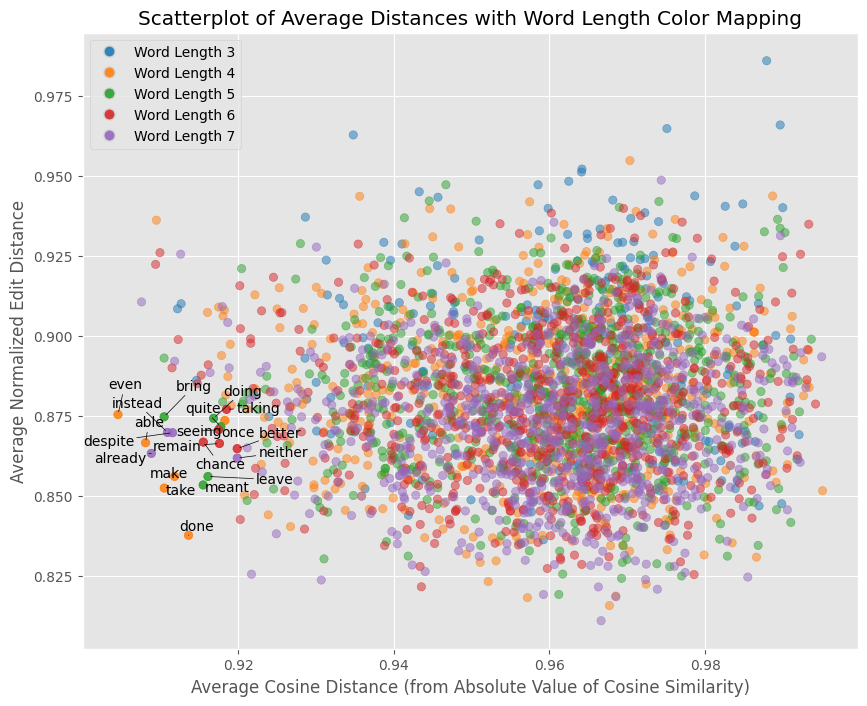

<Figure size 640x480 with 0 Axes>

In [29]:
# Plot the average normalized edit distances against the average cosine distance (abs) 

# Print the original columns
# print("Original columns:", results_df.columns.tolist())

columns_to_keep = ['id', 'word', 'word_length', 'global_avg_cos_dist_abs', 'global_avg_form_dist_edit_norm']

# Select these columns from the DataFrame
abs_edit_df = results_df[columns_to_keep]

# Rename columns for clarity
abs_edit_df = abs_edit_df.rename(columns={
    'global_avg_cos_dist_abs': 'cos_dist_abs',
    'global_avg_form_dist_edit_norm': 'edit_dist_norm'
})

# # Inspect the new DataFrame
# print("Selected columns DataFrame:")
# display(abs_edit_df.head())


# Define the distance score thresholds to annotate selected words
cos_threshold = 0.92
edit_threshold = 0.878

# Filter the DataFrame based on the conditions
central_words_df = abs_edit_df[(abs_edit_df['cos_dist_abs'] < cos_threshold) & (abs_edit_df['edit_dist_norm'] < edit_threshold)]

# Define a color map for different word lengths
cmap = plt.get_cmap('tab10')
word_length_colors = {wl: cmap(i) for i, wl in enumerate(abs_edit_df['word_length'].unique())}

# Create a list of colors based on the word lengths using the color map
colors = [word_length_colors[wl] for wl in abs_edit_df['word_length']]
central_colors = [word_length_colors[wl] for wl in central_words_df['word_length']]

# Create the scatter plots with all data and with annotated selected data 
plt.figure(figsize=(10, 8))
plt.scatter(abs_edit_df['cos_dist_abs'], abs_edit_df['edit_dist_norm'], c=colors, alpha=0.5)
plt.scatter(central_words_df['cos_dist_abs'], central_words_df['edit_dist_norm'], c=central_colors, alpha=0.7)

# Add labels and title
plt.xlabel('Average Cosine Distance (from Absolute Value of Cosine Similarity)')
plt.ylabel('Average Normalized Edit Distance')
plt.title('Scatterplot of Average Distances with Word Length Color Mapping')

# Add legend for word lengths
handles = [plt.Line2D([0], [0], marker='o', color='lightgrey', label=f'Word Length {wl}', markerfacecolor=color, markersize=8, linestyle='None', alpha=0.9) for wl, color in word_length_colors.items()]
plt.legend(handles=handles, loc='upper left')

# Annotate selected points with corresponding words
# for i, txt in enumerate(central_words_df['word']):
#     plt.annotate(txt, (central_words_df['cos_dist_abs'].iloc[i], central_words_df['edit_dist_norm'].iloc[i]), xytext=(5, -5), textcoords='offset points')

# Annotate selected points with corresponding words, avoiding overlap
texts = [plt.text(x, y, label, ha='right', va='bottom') for x, y, label in zip(central_words_df['cos_dist_abs'], central_words_df['edit_dist_norm'], central_words_df['word'])]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Show the plot
plt.grid(True)
plt.show()
plt.savefig(os.path.join('results', 'plots', 'scatter_avg_annotated.pdf'))

In [30]:
def scatter_avg(local_or_global):
    if local_or_global == 'global':
        # Define the global cosine distance types and global form distance types
        cos_dist_types = ['global_avg_cos_dist_abs', 'global_avg_cos_dist_norm', 'global_avg_cos_dist_ang']
        form_dist_types = ['global_avg_form_dist_edit_norm', 'global_avg_form_dist_jaccard']
    elif local_or_global == 'local':
        cos_dist_types = ['local_avg_cos_dist_abs', 'local_avg_cos_dist_norm', 'local_avg_cos_dist_ang']
        form_dist_types = ['local_avg_form_dist_edit_norm', 'local_avg_form_dist_jaccard']
    else: 
        raise ValueError(f"Value {local_or_global} for local_or_global is not valid. Supported values are: 'local' and 'global'." )    
    
    # Create a grid of subplots for all combinations of distance types
    fig, axes = plt.subplots(len(cos_dist_types), len(form_dist_types), figsize=(15, 12))
    for i, cos_dist_type in enumerate(cos_dist_types):
        for j, form_dist_type in enumerate(form_dist_types):
            ax = axes[i, j]
            
            # Get the corresponding global cosine distances and global form distances
            global_cos_dist = results_df[cos_dist_type]
            global_form_dist = results_df[form_dist_type]
            
            # Define a color map for different word lengths
            cmap = plt.get_cmap('tab10')
            word_length_colors = {wl: cmap(i) for i, wl in enumerate(results_df['word_length'].unique())}
            colors = [word_length_colors[wl] for wl in results_df['word_length']]
            
            # Plot global cosine distances against global form distances
            ax.scatter(global_cos_dist, global_form_dist, c=colors, alpha=0.5)
            # ax.set_xlabel(f'{cos_dist_type.replace("_", " ").title()}')
            # ax.set_ylabel(f'{form_dist_type.replace("_", " ").title()}')
            # ax.set_title(f'{cos_dist_type.replace("_", " ").title()} vs {form_dist_type.replace("_", " ").title()}')
            
            if i == j == 0:
                # Add legend for word lengths
                handles = [plt.Line2D([0], [0], marker='o', color='lightgrey', label=f'Word Length {wl}', markerfacecolor=color, markersize=8, linestyle='None', alpha=0.9) for wl, color in word_length_colors.items()]
                ax.legend(handles=handles, loc='upper left')
            
            ax.set_xlabel("Cosine Distance")
            
            if i == 0:
                ax.set_title(f'{form_dist_type.replace("_", " ").title()}', fontsize=12, color='black')
            if j == 0:
                ax.set_ylabel('Form Distance', fontsize=12)
            elif j == 1:
                # Add the type of cosine distance on the right side of the subplot
                ax.text(1.05, 0.5, cos_dist_type.replace("_", " ").title(), ha='left', va='center', rotation=90, fontsize=12, color='black', transform=ax.transAxes)

    plt.suptitle("Scatterplot of Average Cosine and Form Distances", fontsize=16)
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join('results', 'plots', f'scatter_avg_{local_or_global}.pdf'))

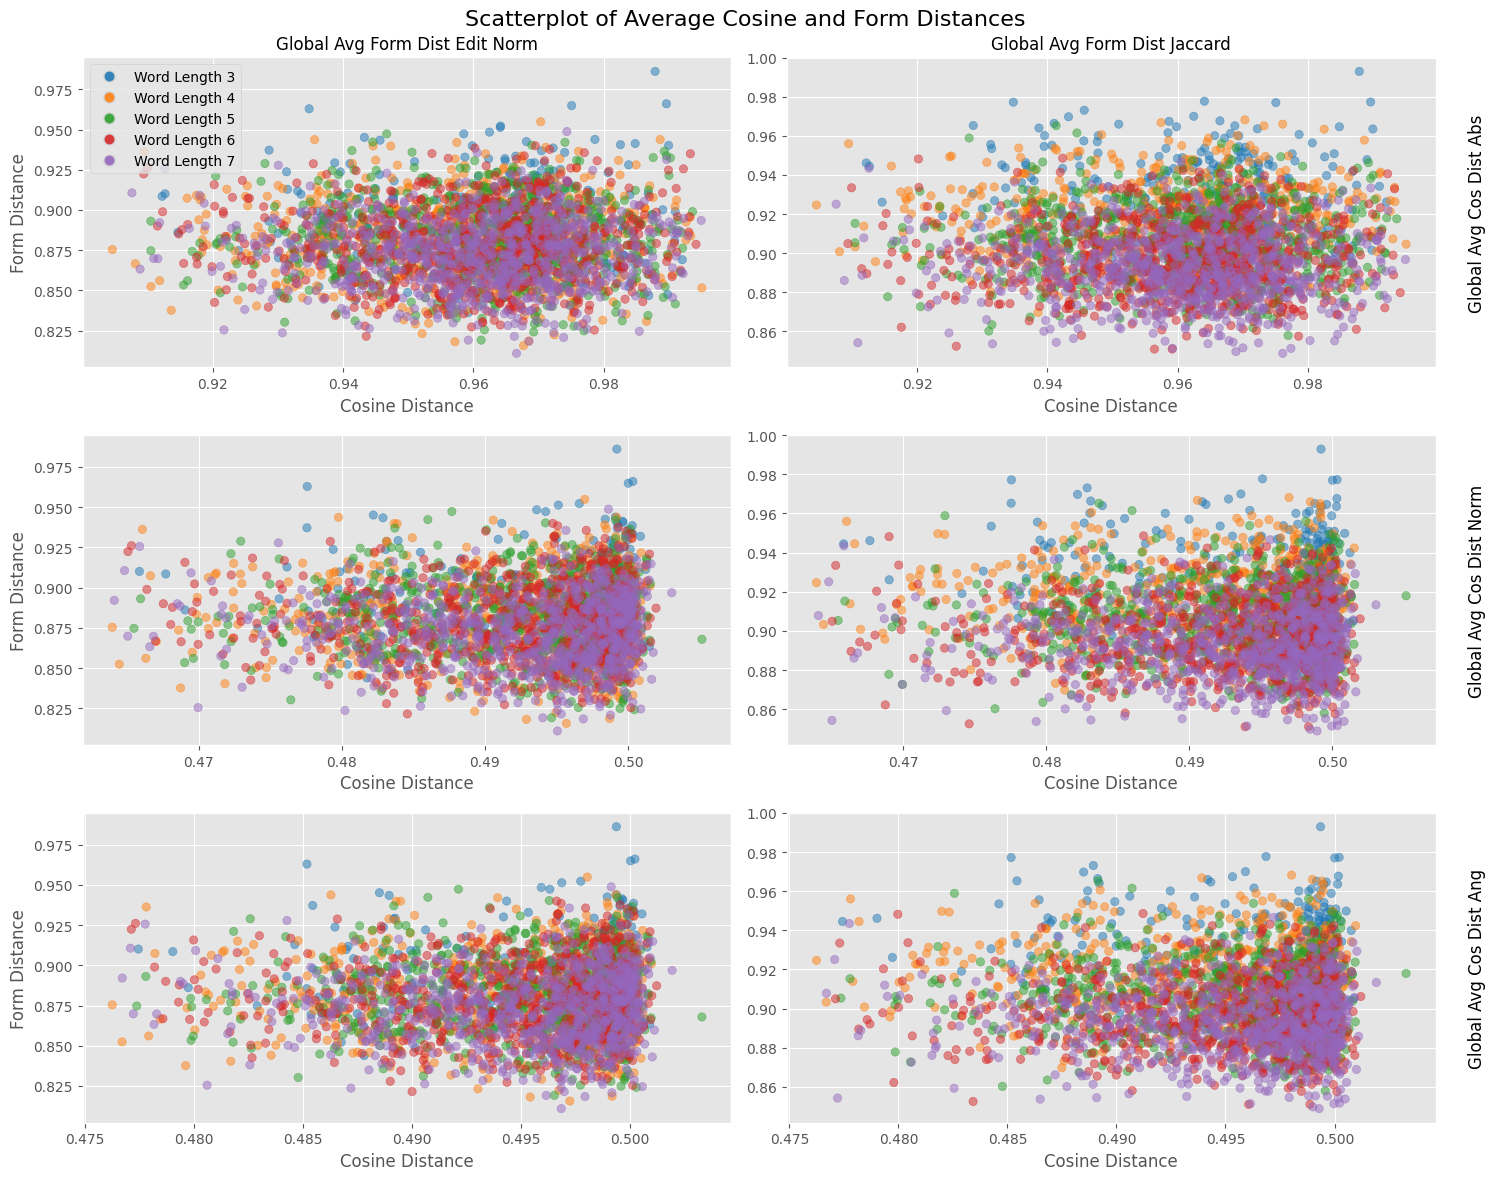

<Figure size 640x480 with 0 Axes>

In [31]:
scatter_avg('global')

# Boxplots average distances per bin

In [12]:
# Bin the words based on 'local_avg_cos_dist_abs', for each word length
results_df['cos_dist_bin'] = results_df.groupby('word_length')['local_avg_cos_dist_abs'].transform(lambda x: pd.qcut(x, q=4, labels=False))

results_df.head()

,id,word,word_length,local_avg_cos_dist_raw,local_avg_form_dist_edit,global_avg_cos_dist_raw,global_avg_form_dist_edit,local_avg_form_dist_edit_norm,global_avg_form_dist_edit_norm,local_avg_form_dist_jaccard,global_avg_form_dist_jaccard,local_avg_cos_dist_norm,global_avg_cos_dist_norm,local_avg_cos_dist_abs,global_avg_cos_dist_abs,local_avg_cos_dist_ang,global_avg_cos_dist_ang,cos_dist_bin
0,1777,cup,3,0.996970,2.850806,0.998499,5.093478,0.950269,0.940146,0.965846,0.963504,0.498485,0.499249,0.989120,0.989983,0.499028,0.499517,3
1,86,art,3,0.999852,2.770161,0.998712,4.617702,0.923387,0.854698,0.919683,0.900313,0.499926,0.499356,0.987452,0.984137,0.499953,0.499571,3
2,3515,jpg,3,0.999198,2.927419,1.000681,5.233851,0.975806,0.966009,0.975918,0.977310,0.499599,0.500341,0.990721,0.989651,0.499745,0.500213,3
3,706,men,3,0.998268,2.645161,0.997824,4.647826,0.881720,0.859669,0.935252,0.913948,0.499134,0.498912,0.974553,0.974577,0.499445,0.499304,3
4,653,law,3,1.000691,2.701613,0.999282,4.877950,0.900538,0.897271,0.940508,0.934777,0.500346,0.499641,0.991053,0.987501,0.500220,0.499740,3


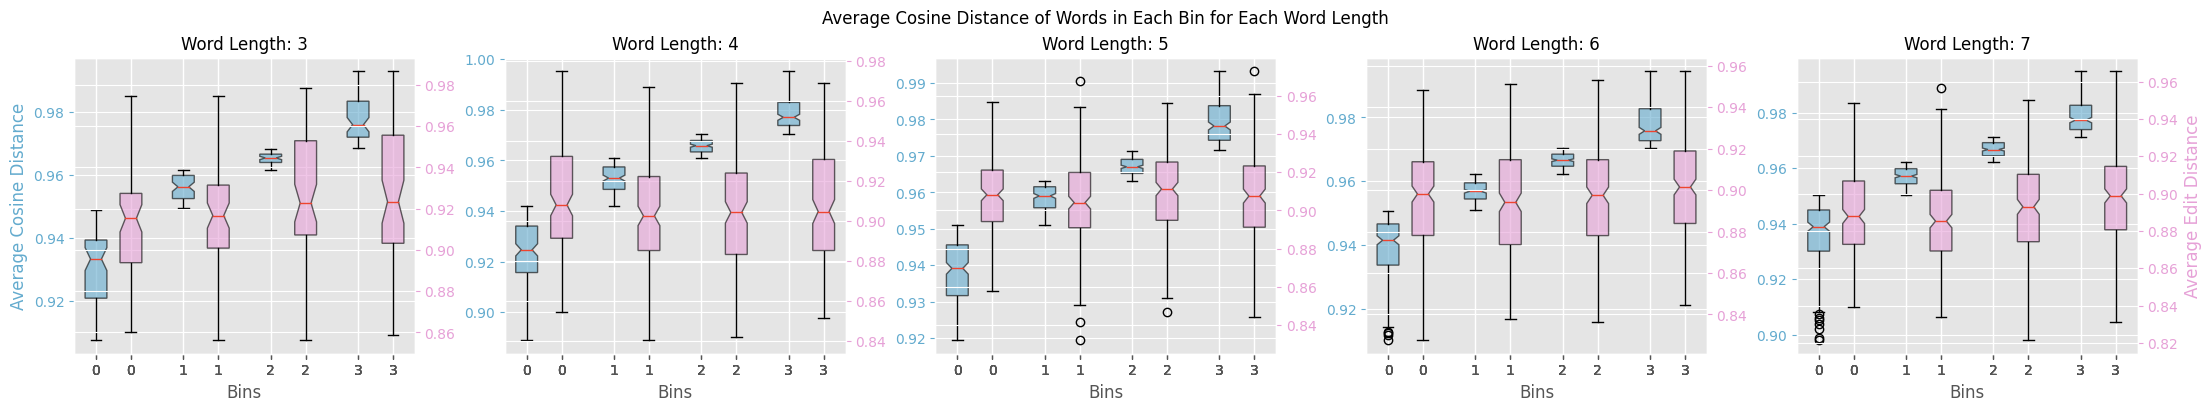

In [16]:
# Define the number of word lengths
num_word_lengths = len(configs.word_lengths)

# Create subplots: each column for a word length
fig, axes = plt.subplots(1, num_word_lengths, figsize=(22, 4), sharex=True, constrained_layout=True)

# Add a title to the entire figure
fig.suptitle('Average Cosine Distance of Words in Each Bin for Each Word Length')

# Define the word lengths
word_lengths = configs.word_lengths

# Loop through each word length (columns)
for col, word_length in enumerate(word_lengths):
    # Retrieve data for the current word length
    sub_df = results_df[results_df['word_length'] == word_length]
    
    # Prepare data and labels for box plots
    cos_dist_data = []
    edit_dist_data = []
    bin_labels = []
    
    # Loop through bins and collect data
    for bin_label in sorted(sub_df['cos_dist_bin'].unique()):  # Ensure consistent bin order
        cos_dist_data.append(sub_df[sub_df['cos_dist_bin'] == bin_label]['local_avg_cos_dist_abs'])
        edit_dist_data.append(sub_df[sub_df['cos_dist_bin'] == bin_label]['local_avg_form_dist_edit_norm'])
        bin_labels.append(bin_label)
    
    # Retrieve the current axis in the grid
    ax_cos = axes[col]
    
    # Define positions for box plots
    positions_cos = [i * 2 - 0.4 for i in range(len(cos_dist_data))]
    positions_edit = [i * 2 + 0.4 for i in range(len(edit_dist_data))]
    
    # Create box plot for average cosine distance (cos dist abs)
    ax_cos.boxplot(cos_dist_data, positions=positions_cos, labels=bin_labels, notch=True, patch_artist=True,
                   boxprops={'facecolor': '#63abce', 'alpha': 0.6}, medianprops={'color': '#ee442f'})
    
    # Add a grid for readability
    ax_cos.grid(True)
    
    # Create a secondary y-axis for average edit distance on the right
    ax_edit = ax_cos.twinx()
    # Ensure that the secondary y-axis shares the same x-axis
    ax_edit.get_shared_x_axes().join(ax_edit, ax_cos)
    # Create box plot for average edit distance (edit dist norm)
    ax_edit.boxplot(edit_dist_data, positions=positions_edit, labels=bin_labels, notch=True, patch_artist=True,
                    boxprops={'facecolor': '#e6a1d7', 'alpha': 0.6}, medianprops={'color': '#ee442f'})
    
    # Add labels and titles
    if col == 0:
        ax_cos.set_ylabel('Average Cosine Distance')   
    if col == num_word_lengths - 1:
        ax_edit.set_ylabel('Average Edit Distance')
    
    # Set y-axis colors
    ax_cos.yaxis.label.set_color('#63abce')
    ax_cos.tick_params(axis='y', colors='#63abce')
    ax_edit.yaxis.label.set_color('#e6a1d7')
    ax_edit.tick_params(axis='y', colors='#e6a1d7')
    
    # Add labels and titles for average cosine distance
    ax_cos.set_title(f'Word Length: {word_length}', fontsize=12)
    ax_cos.set_xlabel('Bins')
    
    # Ensure x-tick labels are visible on each subplot
    ax_cos.tick_params(axis='x', labelbottom=True)
    
# Show the figure with all subplots
plt.show()